In [13]:
import csv
import pandas as pd
import collections
import matplotlib.pyplot as plt
import numpy as np

line = 0
d = collections.OrderedDict()
for i in range(4):
    with open("test{}.csv".format(i+1), encoding="utf-8") as f:
        for l in f:
            line += 1
            cur = l[:-1].split(",")
            for i in cur:
                num = int(i)
                if num in d:
                    d[num] += 1
                else:
                    d[num] = 1

In [14]:
allxc = pd.read_csv("allxc.csv")

In [15]:
pop = [int(allxc[allxc["ID"] == i]["pop"]) for i in d.keys()]
freq = list(d.values())
reg = np.polyfit(pop, freq, 1)
x = max(pop)

school_freq = {"ID": list(d.keys()), "pop": pop, "freq": freq}

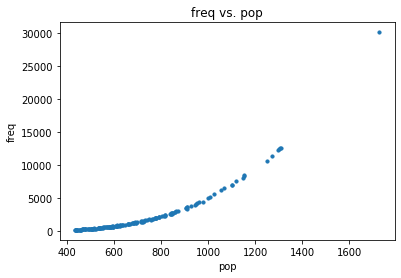

In [16]:
plt.scatter(pop, np.array(freq), s=10)
plt.xlabel("pop")
plt.ylabel("freq")
plt.title("freq vs. pop")
plt.show()

In [17]:
pd.DataFrame(school_freq).to_csv("top16_freq.csv", index=False)